An exploration of the raw dataset using statistical techniques from Stat 403 and previous statistics classes

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import normalize
from matplotlib import pyplot as plt
import statsmodels.api as sm
%config Completer.use_jedi = False

In [3]:
df = pd.read_csv(r'database\\healthcare-dataset-stroke-data.csv',index_col=0)

In [4]:
df.dropna(inplace=True)

In [5]:
inx = df['stroke'] == 1
num_cols = ['age','avg_glucose_level','bmi']
num_S = df.loc[inx, num_cols]
num_N = df.loc[~inx, num_cols]

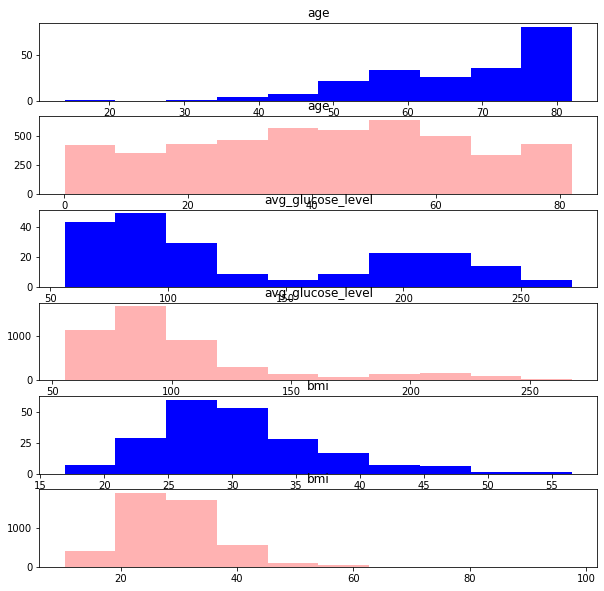

In [6]:
fig, axs = plt.subplots(6,1,figsize=[10,10])
num = 0
for col in num_cols:
    plt.sca(axs[num])
    num+=1
    plt.hist(num_S[col],color='blue')
    plt.title(col)

    plt.sca(axs[num])
    num+=1
    plt.hist(num_N[col],color='red',alpha=0.3)
    plt.title(col)

In [7]:
for col in num_cols:
    print(stats.ttest_ind(num_S[col],num_N[col],equal_var=False))

Ttest_indResult(statistic=28.29061007686151, pvalue=5.877629205726295e-83)
Ttest_indResult(statistic=7.001495143391008, pvalue=3.127926249133996e-11)
Ttest_indResult(statistic=3.6404100561556993, pvalue=0.00033397100131216)


the t test indicates that the means of patients with strokes and different from no strokes for age, avg_glucose_level and bmi


In [8]:
bin_cols = ['gender','hypertension','heart_disease','ever_married']

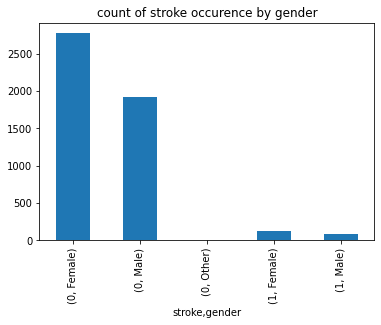

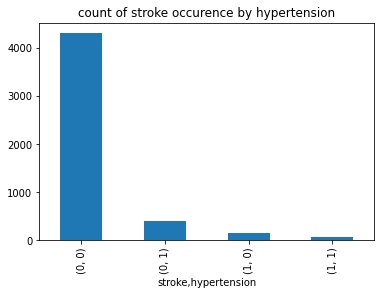

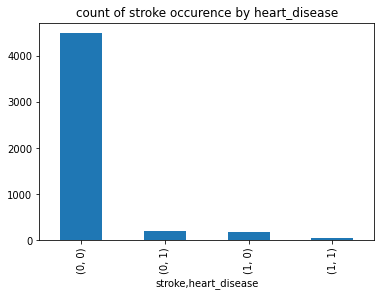

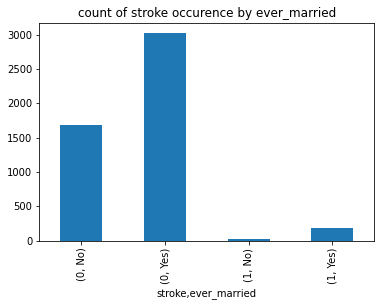

In [9]:
for i in range(0,len(bin_cols)):
# for i in range(0,4):
    df.groupby(['stroke',bin_cols[i]]).agg('count')[['bmi']].plot(kind='bar', 
                                                           title = 'count of stroke occurence by '+bin_cols[i],
                                                           legend = False
                                                           )


In [10]:
numM = df.query('gender == "Male"').shape[0]
numMStroke = df.query('gender == "Male" & stroke == 1').shape[0]
numF = df.query('gender == "Female"').shape[0]
numFStroke = df.query('gender == "Female" & stroke == 1').shape[0]

In [11]:
sm.stats.proportions_ztest([numMStroke,numFStroke],[numM, numF])

(0.4836398852562626, 0.6286414631826445)

We see that the difference in proportion is not statistically significant at all

In [12]:
inx1 = df['hypertension']==1
inx2 = df['stroke']==1
numH = (inx1).sum()
numNH = (~inx1).sum()
numHS = (inx1&inx2).sum()
numNS = (~inx1&inx2).sum()

In [13]:
sm.stats.proportions_ztest([numHS,numNS],[numH, numNH])

(9.985179861891456, 1.7697981937746714e-23)

We see that the proportion of people with hypertension and having a stroke is statistically higher than the number of people without hypertension and having a stroke

In [14]:
inx1 = df['heart_disease']==1
inx2 = df['stroke']==1
numH = (inx1).sum()
numNH = (~inx1).sum()
numHS = (inx1&inx2).sum()
numNS = (~inx1&inx2).sum()

In [15]:
sm.stats.proportions_ztest([numHS,numNS],[numH, numNH])

(9.66450849471416, 4.266630359370293e-22)

We see that the proportion of people with heart disease and having a stroke is statistically higher than the number of people without heart disease and having a stroke

In [16]:
inx1 = df['ever_married']== 'Yes'
inx2 = df['stroke']==1
numH = (inx1).sum()
numNH = (~inx1).sum()
numHS = (inx1&inx2).sum()
numNS = (~inx1&inx2).sum()

In [17]:
sm.stats.proportions_ztest([numHS,numNS],[numH, numNH])

(7.362992701933523, 1.7983220712673243e-13)

We see that the proportion of people that have been married and having a stroke is statistically higher than the number of people never married and having a stroke